# Introduction

SERPENS is a module build upon the [REBOUND](https://rebound.readthedocs.io/en/latest/) and [REBOUNDx](https://reboundx.readthedocs.io/en/latest/index.html#) libraries designed for the simulation of evaporating exomoons.
The main classes of SERPENS are the `SerpensSimulation` and `SerpensAnalyzer` classes. Prior is a subclass of the REBOUND `Simulation` class. 

This repository holds multiple pre-defined celestial systems, captured in the _resources/objects.json_ file. You can find a list of these systems below. Except "Jupiter (Europa-Source)" all of these systems host an exo-Io exomoon which is per default sourcing Sodium on regular time intervals.
* Jupiter (Io-Source)
* Jupiter (Europa-Source)
* WASP-49
* WASP-69
* WASP-17
* WASP-39
* WASP-52
* WASP-96
* HD-189733
* HD-209458
* HAT-P-1
* XO-2N

Default integration parameters for the SERPENS simulation can be found in the _resources/input_parameters.json_ file.  

## Starting a Exomoon Simulation

We may start a SERPENS simulation using the `SerpensSimulation` class. 
In this example we simulate HD-189733 including the planet HD-189733 b and a sourcing exo-Io. 

In [4]:
from serpens_simulation import SerpensSimulation

sim = SerpensSimulation(system="HD-189733")

Initializing new simulation instance...
	 	 ... done!


In order to start the simulation, we need to integrate it in time. In contrast to the REBOUND simulation, SERPENS calls this method `advance` which utilizes REBOUND's `integrate` method under the hood. Using `integrate` directly may result in undesired results. 

The `advance` methods measures time in terms of multiples of the `sim_advance` parameter set inside the _resources/input_parameters.json_ file. This parameter is given in units of **exomoon orbital periods**. As an example, with `sim_advance = 0.01` a single `advance` will integrate for 0.01 of an exomoon orbit.

Let's integrate the simulation for 15% of an orbit:

In [5]:
sim.advance(15)

100%|██████████| 15/15 [00:02<00:00,  5.36it/s]

                .                                            .
     *   .                  .              .        .   *          .
  .         .                     .       .           .      .        .
        o                             .                   .
         .              .                  .           .
          0     .
                 .          .                 ,                ,    ,
 .          \          .                         .
      .      \   ,
   .          o     .                 .                   .            .
     .         \                 ,             .                .
               #\##\#      .                              .        .
             #  #O##\###                .                        .
   .        #*#  #\##\###                       .                     ,
        .   ##*#  #\##\##               .                     .
      .      ##*#  #o##\#         .                             ,       .
          .     *#  #\#     .       

After the simulation is, you will find multiple new files inside your working directory. These are files that contain the necessary simulation file for analysis using the `SerpensAnalyzer` class.

## Analyzing the Simulation

After the simulation is done, we can plot it using the `SerpensAnalyzer` class. 

Let's start with a top-down view on the system. Note that with the code below you will likely not be able to interact with the plot, although you'll see a slider on the right side. Running the code from a Python file should allow you to. 

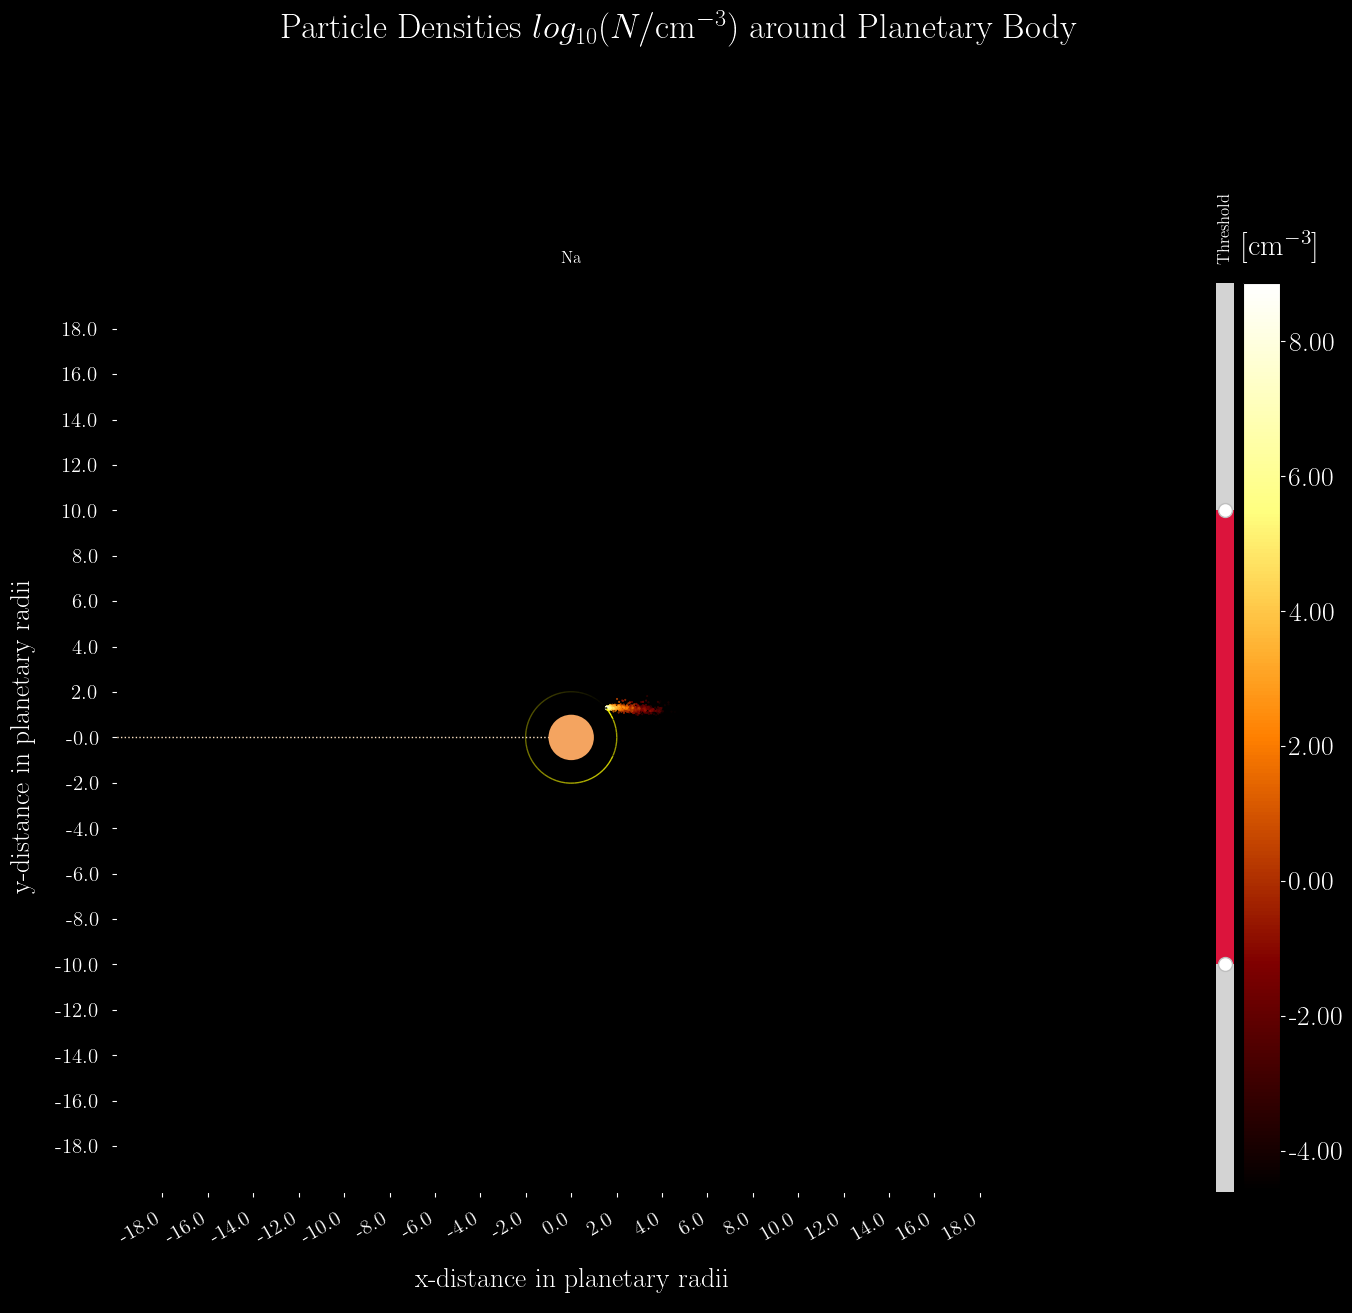

In [9]:
%matplotlib inline

from serpens_analyzer import SerpensAnalyzer

sa = SerpensAnalyzer(save_output=False, reference_system="source0")
sa.plot_planar(timestep=14)

And let's also plot the a line-of-sight plot:

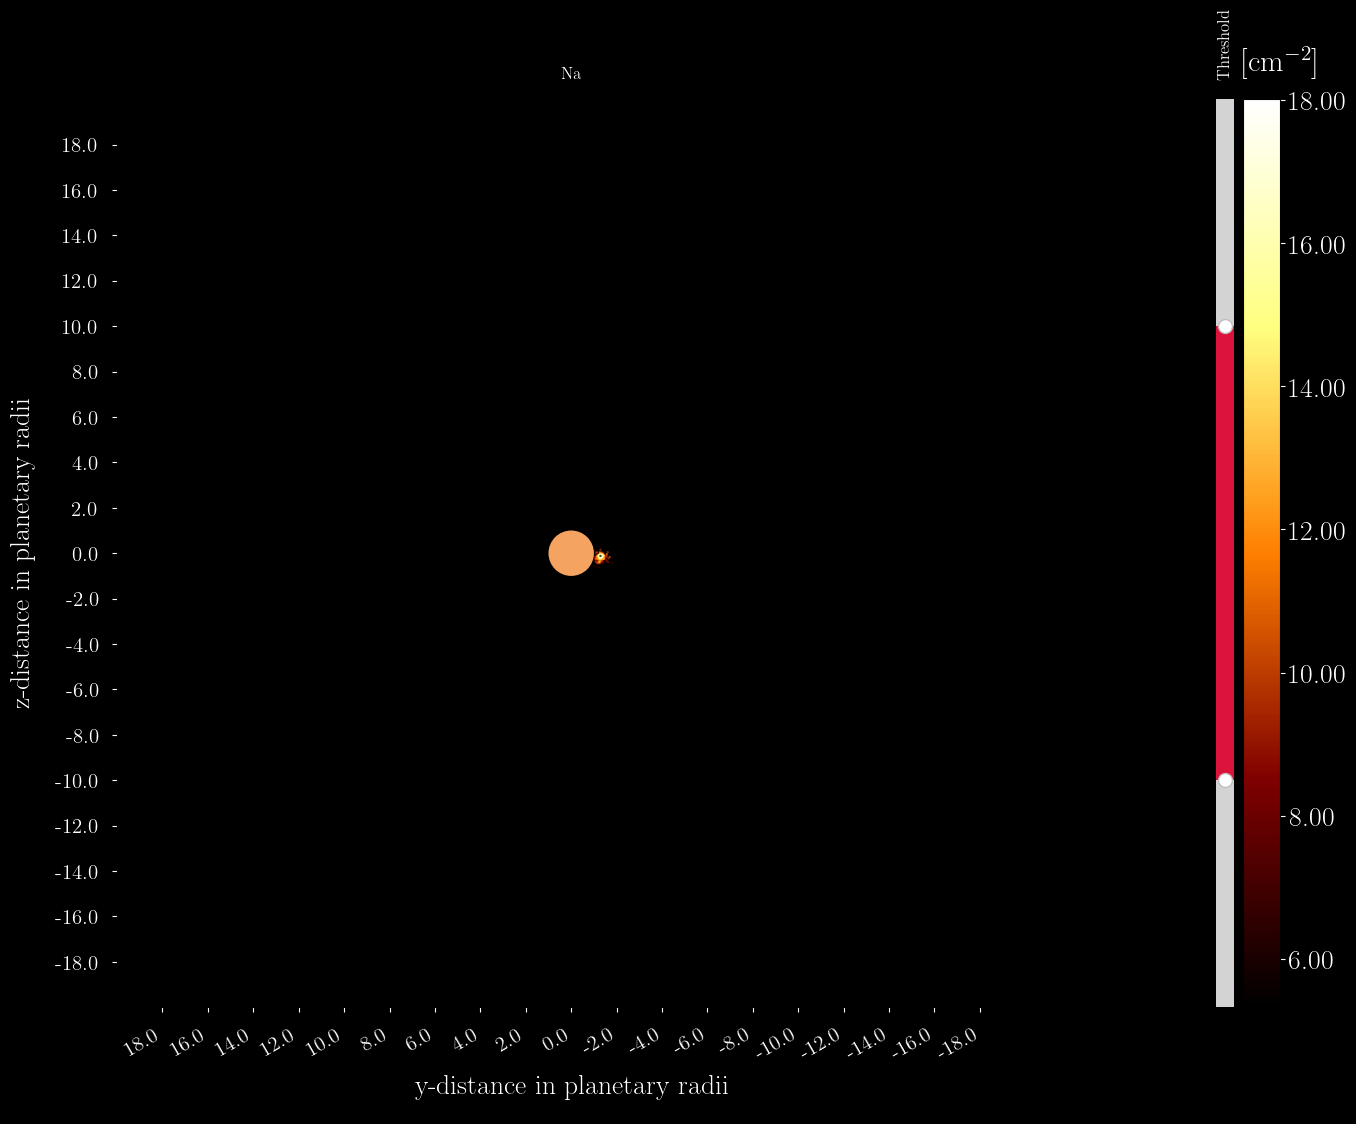

In [10]:
%matplotlib inline

sa.plot_lineofsight(timestep=14)